In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
aq = pd.read_csv('/content/air_quality_health_impact_data.csv')
aq.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [3]:
aq.shape

(5811, 15)

In [4]:
X = aq.drop(columns = 'O3')
y = aq['O3']
X.shape

(5811, 14)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [8]:
# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=70)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [9]:
# Support Vector Regressor (SVM)
model_svr = SVR(kernel='linear')
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [10]:
# XGBoost Regressor
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [11]:
# Print the results
print("Linear Regression MSE:", mse_lr, "R2 Score:", r2_lr)
print("Random Forest MSE:", mse_rf, "R2 Score:", r2_rf)
print("SVR MSE:", mse_svr, "R2 Score:", r2_svr)
print("XGBoost MSE:", mse_xgb, "R2 Score:", r2_xgb)

Linear Regression MSE: 7369.6961458765245 R2 Score: 0.03907181216623912
Random Forest MSE: 6338.537736807285 R2 Score: 0.17352364868474424
SVR MSE: 7509.609034925154 R2 Score: 0.020828693825015288
XGBoost MSE: 6894.515408105741 R2 Score: 0.10103020993479195


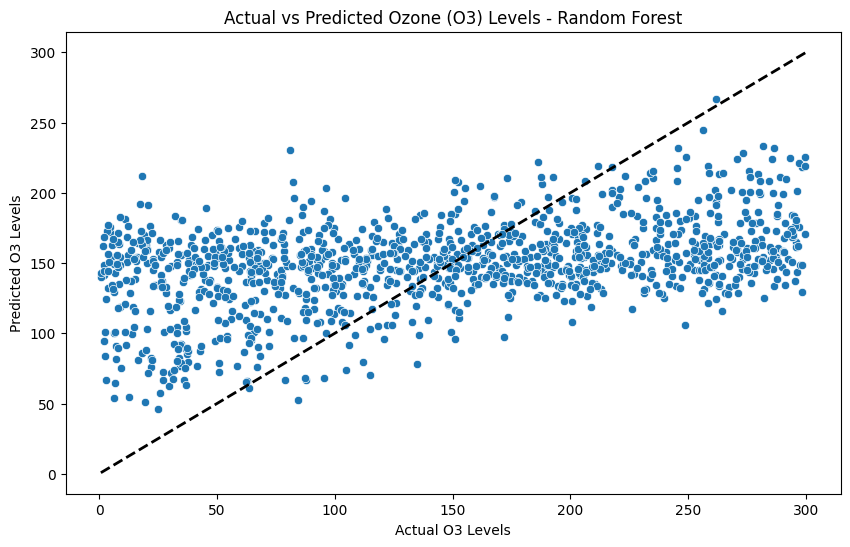

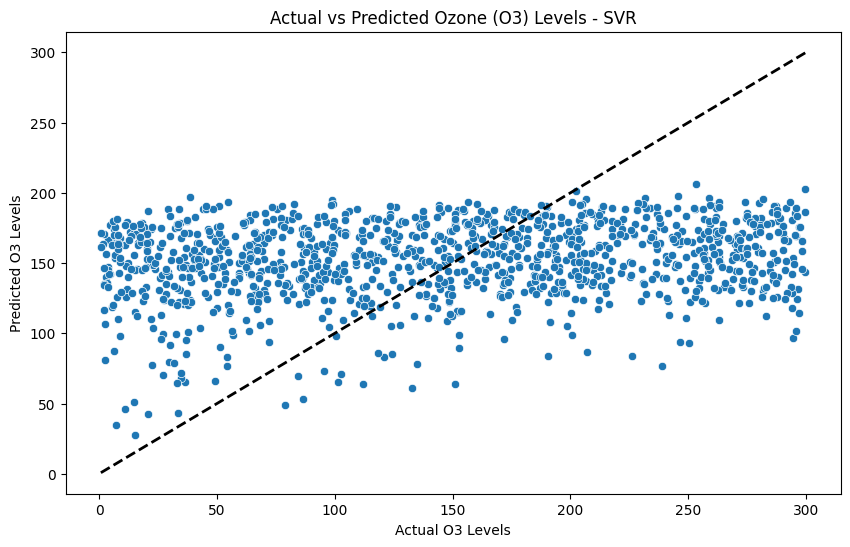

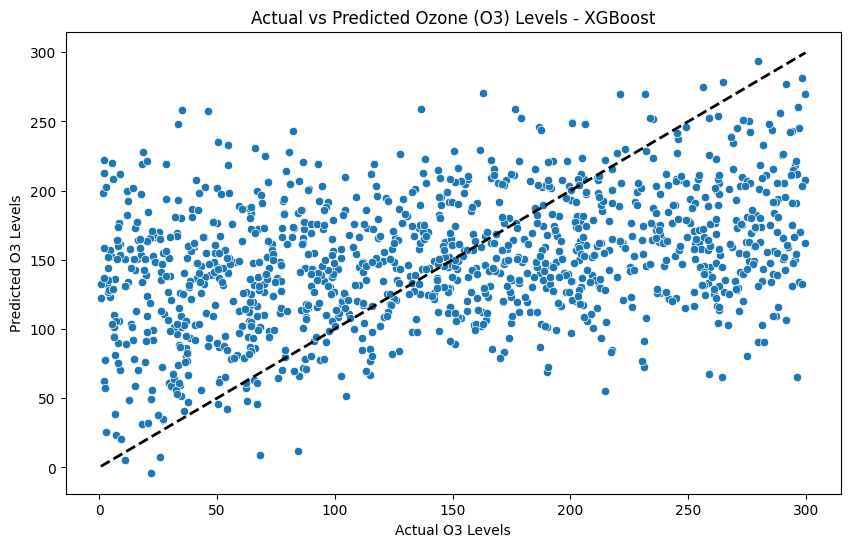

In [12]:
# Plotting Actual vs Predicted Ozone (O3) Levels for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Ozone (O3) Levels - Random Forest')
plt.xlabel('Actual O3 Levels')
plt.ylabel('Predicted O3 Levels')
plt.show()

# Plotting Actual vs Predicted Ozone (O3) Levels for SVR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Ozone (O3) Levels - SVR')
plt.xlabel('Actual O3 Levels')
plt.ylabel('Predicted O3 Levels')
plt.show()

# Plotting Actual vs Predicted Ozone (O3) Levels for XGBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Ozone (O3) Levels - XGBoost')
plt.xlabel('Actual O3 Levels')
plt.ylabel('Predicted O3 Levels')
plt.show()